In [1]:
pip install pycrypto

     |████████████████████████████████| 446 kB 7.3 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=1fadc60bc8b24038ee1a502116c7ec1491950a8dfb1face8acc6bb026f0cbe71
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from random import randrange, getrandbits
import math
import random
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from Crypto.Util import number
%matplotlib inline
prime = [number.getPrime(128),number.getPrime(128)]

In [4]:
def is_prime_miller(n, k=40):
    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    for _ in range(k):
        a = randrange(2, n - 1)
        x = pow(a, r, n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = pow(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True

In [5]:
def fme(a,d,n):
  ans= 1
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans

In [6]:
def GCD(a,b):
    if a==0:
      return b;
    return GCD(b%a,a)

In [7]:
if is_prime_miller(prime[0]) and is_prime_miller(prime[1]) :
    N=prime[0]*prime[1]
    eulerTotient=(prime[0]-1)*(prime[1]-1)
    for e in range(3,eulerTotient,2):
      if GCD(e,eulerTotient)==1:
          break
    a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,e
    while d2!=1:
      k=(d1//d2)
      temp=a2
      a2=a1-(a2*k)
      a1=temp

      temp=b2
      b2=b1-(b2*k)
      b1=temp

      temp=d2
      d2=d1-(d2*k)
      d1=temp

      D=b2
      
    if D>eulerTotient:
      D=D%eulerTotient
    elif D<0:
      D=D+eulerTotient

In [8]:
print("E",e)
print("D",D)
print("N",N)
print("eulerToitient",eulerTotient)

E 3
D 32876876087687278614523098832326821958702621086220208444422620693933126464443
N 49315314131530917921784648248490232938500420135964314871770041933483963119831
eulerToitient 49315314131530917921784648248490232938053931629330312666633931040899689696664


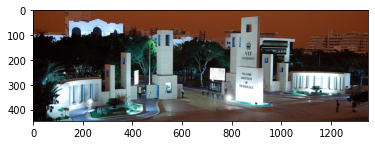

In [9]:
my_img = cv2.imread("/content/drive/MyDrive/NIS Project/vit-cover.jpeg")
# cv2_imshow(my_img)
plt.imshow(my_img, cmap="gray")

In [ ]:
row,col=my_img.shape[0],my_img.shape[1]
img = np.array(my_img, dtype=np.object)

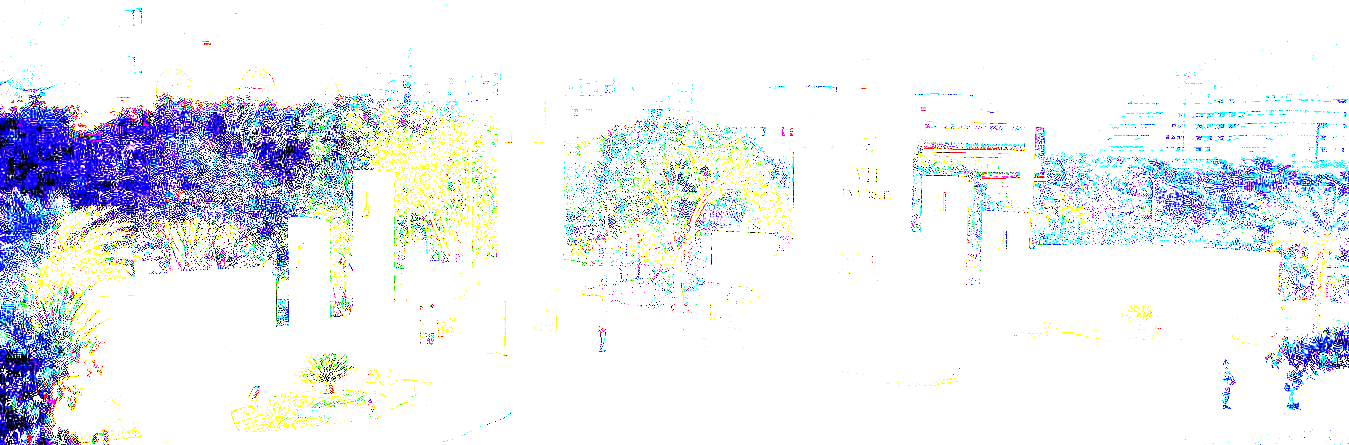

In [11]:
for i in range(row):
  for j in range(col):
    r,g,b=img[i,j]
    C1= fme(r,e,N)
    C2= fme(g,e,N)
    C3= fme(b,e,N)
    img[i,j]= [C1,C2,C3]
cv2_imshow(img)

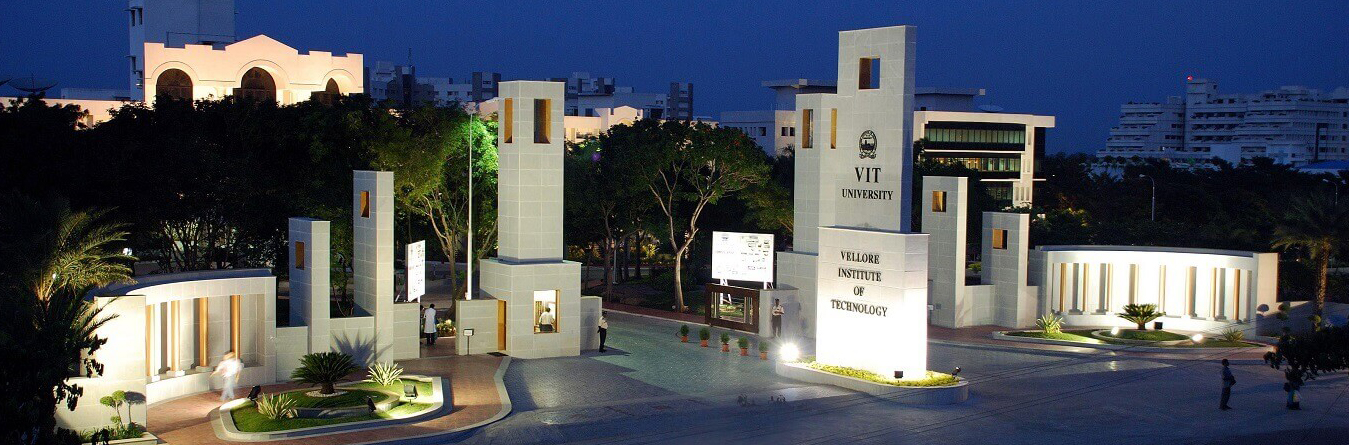

In [12]:
for i in range(row):
  for j in range(col):
    r,g,b=img[i,j]
    M1= fme(r,D,N)
    M2= fme(g,D,N)
    M3= fme(b,D,N)
    img[i,j]= [M1,M2,M3]
cv2_imshow(img)